# Diabetes Classification

## ``Step 1: Define the Problem``
Develop an algorithm to predict the diabetic nature of a patient based on the certain diagnostic measurement.
## ``Step 2: Gather the Data``
### Description of Dataset
This dataset is originally from the `National Institute of Diabetes and Digestive and Kidney Diseases`. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
%load_ext autoreload
%autoreload 2

## ``STEP 3: Prepare Data``
### ``3.1: Import Libraries``

In [2]:
import pandas as pd
import os
import dotenv
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
plt.rcParams['figure.figsize'] = 5,5

In [3]:
dotenv.load_dotenv()
sys.path.append('../src')

from load_data import DataIngestorFactory

### ``3.2: Meet and Greet Data``

#### Content
The datasets consists of several medical predictor variables and one target variable, Outcome.

Predictor variables includes:
1. `Pregnancies`: The number of pregnancies the patient has had. It is descrete quantitative datatype.
2. `Plasma Glucose`: Commonly known as blood sugar measured in mg/dl (milligram/deciliter) Note: 1 deciliter = 100 milliliter. It is continuous quantitative datatype.
3. `Diastolic Blood Pressure`:The bottom number in a blood pressure reading, which measures the force of blood in your arteries when your heart is relaxed between beats.
4. `Triceps Thickness`:A measurement of subcutaneous fat(fat that is stored under your skin and can be pinched.) in the limbs and is used to estimate total body fat composition. It is continuous quantitative datatype.
5. `Serum Insuline`: A measurement of the amount of insulin in a person's blood. Continuous quantitative datatype.
6. `BMI`: Body Mass Indes is quantitative datatype.
7. `Diabetes Pedigree`:A family tree that shows the diabetes status of each family member, as well as other relevant information. A diabetes pedigree can be used to calculate the likelihood of a person developing diabetes based on their family history and age. This calculation is called the Diabetes Pedigree Function (DPF), and it produces a score that ranges from 0.08 to 2.42. A higher DPF score indicates a higher likelihood of developing diabetes. This is continuous datatype.
8. `Age`: Age of the patient. This is continuous quantitative datatype.
9. `Diabetic`: It is a binary nominal descrete datatype with values 0 and 1.

In [4]:
data_ingestor = DataIngestorFactory().get_data_ingestor(file_extension="db")
table_name = "diabetes"
if data_ingestor:
    df: pd.DataFrame = data_ingestor.ingest(
        db_name=os.getenv("MYSQL_DATABASE"),
        table_name=table_name,
        db_password=os.getenv("MYSQL_PASSWORD"),
        db_host="localhost",
    )

2024-12-25 16:43:00.375 | INFO     | load_data:connect_database:42 - Database connected successfully.


In [5]:
print("-*-"*30)
print("FIRST 5 ROWS")
print("-*-"*30)
print(df.head())
print("-*-"*30)
print("LAST 5 ROWS")
print("-*-"*30)
print(df.tail())
print("-*-"*30)
print("RANDOM 5 ROWS")
print("-*-"*30)
print(df.sample(5))

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
FIRST 5 ROWS
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10000 non-null  int64  
 1   Pregnancies             10000 non-null  int64  
 2   PlasmaGlucose           10000 non-null  int64  
 3   DiastolicBloodPressure  10000 non-null  int64  
 4   TricepsThickness        10000 non-null  int64  
 5   SerumInsulin            10000 non-null  int64  
 6   BMI                     10000 non-null  float64
 7   DiabetesPedigree        10000 non-null  float64
 8   Age                     10000 non-null  int64  
 9   Diabetic                10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


### ✤ Insights From Data Types
1. There are 7 columns with data type as integer
2. There are 2 columns with float64 datatype.

>Note: There are no categorical features

In [7]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


### ✤ Insights From Summary Statistics
1. `PlasmaGlucose` ranges from **44** to **192** indicating data with low blood glucose as well as high blood glucose. Depends on how data was collected i.e. During Fasting or After Eating or 2-3 Hours after eating, the range varies.
2. `DiastolicBloodPressure` has range from **24 mm Hg** to **117 mm Hg** indicating people with extremely high blood pressure as well as extremely low blood pressure.
3. `SerumInsulin` has outliers which might affect the prediction. It's minimum value is 14 which indicates, these women might be suffering from diabetes.
4. `BMI`: The maximum BMI is 56 which indicates some women fall into `obese` category.
5. `DiabetesPedigree` whose value range from 0.08 to 2.42, majority of values lie below _**0.62**_ indicating there are only 25% of observation higher than 0.62. Also the mean of 0.4 indicates that women on average has less chance of getting a diabetes.

The target variable `Diabetic` has a mean of 0.334 which means there is **33.4%** chance of getting diabetes.

In [8]:
df.isna().sum(axis=0)

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

#### Missing Values Analysis (Completing)
This dataset has no missing values.
#### Correcting
1. **Dropping of column**<br>
Column `PatientID` is non usable and does not contribute to the target varaible. Thus dropping it.
2. **Outlier detection and handeling**<br>
Column `SerumInsulin` has outlier which need to be handled.
#### Creating
1. We may want to create a new feature for Age bands. This converts continuous into descrete ordinal feature.
2. We want to create a range for Pregnancies, PlasmaGlucose, DiastolicBloodPressure, SerumInsulin, BMI, DiabetesPedigree.

### ✤ Issues to be addressed later
3. **Correlation and Multicollinearity**<br>
Multiple independent columns might be correlated with eachother. Performing test and removing such correlation will help in doing effective prediction.

#### Dropping unwanted columns

In [9]:
df.drop(columns=["PatientID"], inplace=True)

### Analyzing by visualizing
#### Correlating numerical features

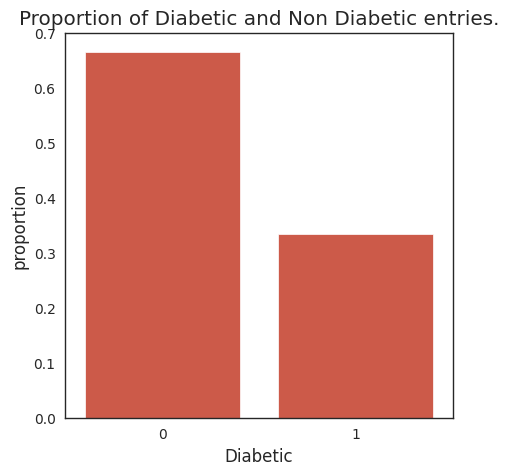

In [10]:
sns.countplot(data=df, x="Diabetic", stat="proportion")
plt.title("Proportion of Diabetic and Non Diabetic entries.")
plt.ylim([0.0,0.7]);

More than **65%** of women in the data are non diabetic and about **30%** are diabetic. Showing class imbalance. <br>

**Decision** <br>
- Implement SMOTE or any other over sampling algorithm to solve the class imbalance problem.

#### * Age

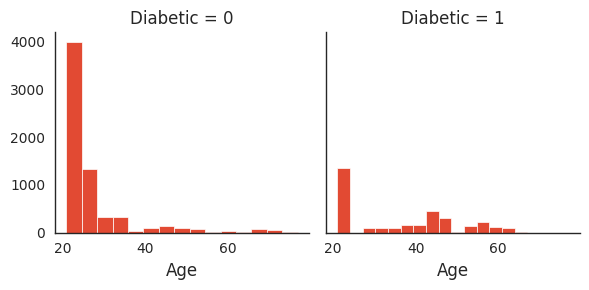

In [11]:
g = sns.FacetGrid(data=df, col="Diabetic")
g.map(plt.hist, 'Age',bins=15)

#### Insights
1. Women with Age > 60 did not suffer from diabetes.
2. Most of womens with Age >20 and Age < 50 have higher diabetes rate.
3. Most womens are in the range of 20-50 years.

**Decision** <br>
- Consider Age for model training.

#### * Number of Pregnancies

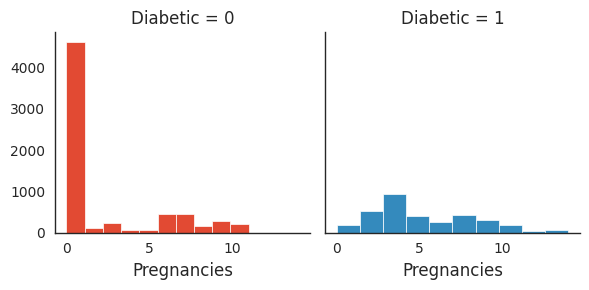

In [12]:
g = sns.FacetGrid(data=df, col="Diabetic", hue="Diabetic")
g.map(plt.hist, "Pregnancies")

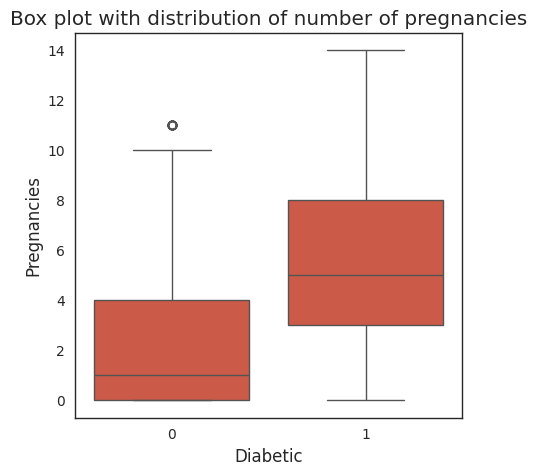

In [13]:
sns.boxplot(data=df, x="Diabetic", y="Pregnancies")
plt.title("Box plot with distribution of number of pregnancies");

#### Insights
1. Apparently women with 3 to 4 children are more prone to diabetes.
2. Women with no children are more less prone to diabetes.

**Decision** <br>
- Condider Pregnancies for model training.

#### * Plasma Glucose

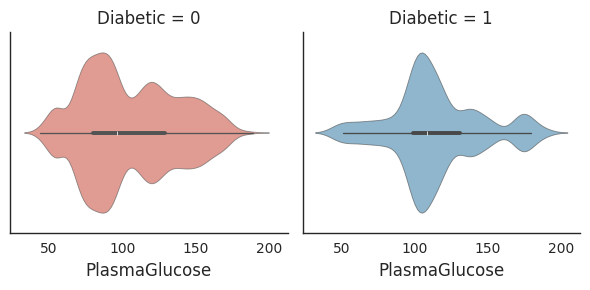

In [14]:
g = sns.FacetGrid(data=df, col="Diabetic", hue="Diabetic")
g.map(sns.violinplot, "PlasmaGlucose", alpha=0.6)

### Insights
1. Majority of diabetic women have glucose level around 100.
1. Majority of non-diabetic women have glucose level around 80.

#### * DiastolicBloodPressure

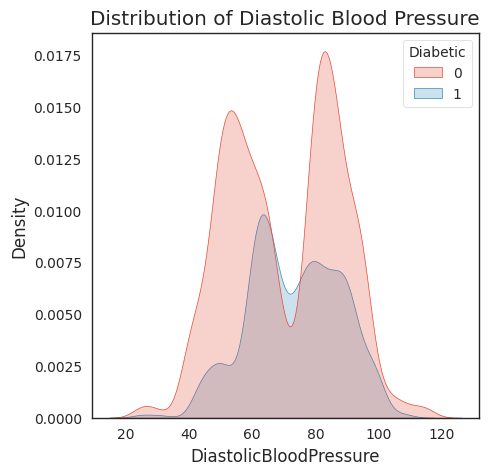

In [19]:
sns.kdeplot(data=df, x="DiastolicBloodPressure", hue="Diabetic", shade=True)
plt.title("Distribution of Diastolic Blood Pressure");

#### Insights
1. Women with Diastolic Blood Pressure around 50 and 80 have lesser chance of getting diabetes.

#### * TricepsThickness

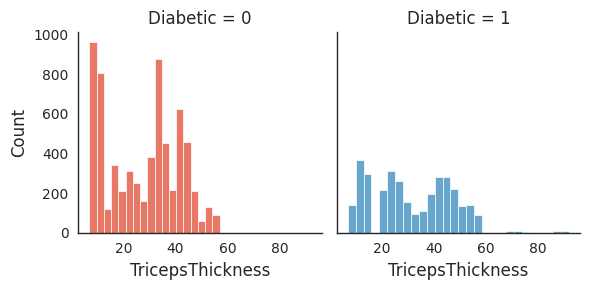

In [52]:
g = sns.FacetGrid(data=df, col="Diabetic", hue="Diabetic")
g.map(sns.histplot, "TricepsThickness");

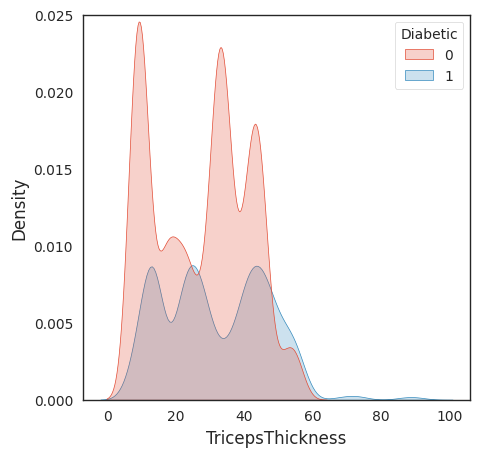

In [51]:
sns.kdeplot(data=df, x="TricepsThickness", hue="Diabetic", shade=True)
plt.ylim([0, 0.025]);